# Школа глубокого обучения

<a href="https://mipt.ru/science/labs/laboratoriya-neyronnykh-sistem-i-glubokogo-obucheniya/"><img align="right" src="https://avatars1.githubusercontent.com/u/29918795?v=4&s=200" alt="DeepHackLab" style="position:relative;top:-40px;right:10px;height:100px;" /></a>



### Физтех-Школа Прикладной математики и информатики МФТИ 
### Лаборатория нейронных сетей и глубокого обучения (DeepHackLab)  
 Дедлайн -- 11 ноября

## Домашнее задание 1
### Основы Python и пакет NumPy
---


In [3]:
import numpy as np
import random
import scipy.stats as sps

### Задача 1
В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета ***numpy*** и с ним.

In [3]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((3,3))
b = np.random.sample((3,3))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
ash = np.shape(a)
bsh = np.shape(b)
print("Ранг матрицы a:", np.ndim(a))
print("Ранг матрицы b:",  np.ndim(b))
print("У матрицы a", ash[0], "столбцов(-а) и", ash[1], "строк(-и).")
print("У матрицы b", bsh[0], "столбцов(-а) и", bsh[1], "строк(-и).")
# ========
print(a)
print(b)

Ранг матрицы a: 2
Ранг матрицы b: 2
У матрицы a 3 столбцов(-а) и 3 строк(-и).
У матрицы b 3 столбцов(-а) и 3 строк(-и).
[[ 0.05308578  0.55832031  0.75321952]
 [ 0.11052824  0.23888194  0.35342395]
 [ 0.71000858  0.58427634  0.8331914 ]]
[[ 0.47190448  0.95328229  0.66565263]
 [ 0.56963283  0.43846924  0.98822702]
 [ 0.48484794  0.16277661  0.751558  ]]


In [40]:
def mult(a, b):
    """Multiplies two square matrices
       A and B - and returns the result.
       Input: ndarray, ndarray
       Output: ndarray
    """
    
    zip_b = list(zip(*b)) 
    # convert the second matrix to inverted list of matrices
    
    res = np.array([[sum(el_a * el_b for el_a, el_b in zip(row, col)) 
             for col in zip_b] for row in a])
    
    print(res)
    return res



def mult_madeInABus(A, B):
    """Multiplies two square matrices
       A and B - and returns the result.
       Input: ndarray, ndarray
       Output: ndarray
    """
    
    Al = list(map(list, list(a1)))
    Bl = list(map(list, list(b1)))
    al = A.shape[0]
    bl = B.shape[1]
    C =  np.zeros(shape=(al, bl), dtype=A.dtype)
    for i in range(al):
        for j in range(bl):
            C[i][j] = 0
            for k in range(al):
                C[i][j] += A[i][k]*B[k][j]
    
    print(C)
    return C


In [41]:
def np_mult(a, b):
    print(a @ b)
    return a @ b

In [43]:
a1 = np.array([[1, 2, 3],
           [1, 2, 3],
           [1, 2, 3]])
b1 = np.array([[1, 2, 3],
           [1, 2, 3],
           [1, 2, 3]])

r0 = mult_madeInABus(a1, b1)
r1 = mult(a1, b1)
r2 = np_mult(a1, b1)

[[ 6 12 18]
 [ 6 12 18]
 [ 6 12 18]]
[[ 6 12 18]
 [ 6 12 18]
 [ 6 12 18]]
[[ 6 12 18]
 [ 6 12 18]
 [ 6 12 18]]


In [47]:
%%time
# засечем время работы функции без NumPy
mult(a,b)

[[ 0.70828592  0.41801854  1.15317206]
 [ 0.35959064  0.26763615  0.5752616 ]
 [ 1.07185034  1.06864988  1.67620841]]
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 518 µs


array([[ 0.70828592,  0.41801854,  1.15317206],
       [ 0.35959064,  0.26763615,  0.5752616 ],
       [ 1.07185034,  1.06864988,  1.67620841]])

In [48]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)

[[ 0.70828592  0.41801854  1.15317206]
 [ 0.35959064  0.26763615  0.5752616 ]
 [ 1.07185034  1.06864988  1.67620841]]
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 956 µs


array([[ 0.70828592,  0.41801854,  1.15317206],
       [ 0.35959064,  0.26763615,  0.5752616 ],
       [ 1.07185034,  1.06864988,  1.67620841]])

### Задача 2
Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.  
Аналогично -- с помощью библиотеки **NumPy** и без нее. Сравните скорость, объясните результат.

In [49]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    # Ваш код здесь
    return A.cumsum() / (np.indices(A.shape) + 1)

In [57]:
# функция без NumPy
def stupid_sec_av(A):
    S = [0 for i in range(len(A))]
    for i in range(len(A)):
        S[i] = A[i] + S[abs(i-1)]
    for i in range(len(A)):
        S[i] /= i+1
    S[0] = A[0]
    return S

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** 7) 

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
#проверим корректность:
assert np.abs(S1 - S2).sum() == 0

CPU times: user 112 ms, sys: 80 ms, total: 192 ms
Wall time: 192 ms
CPU times: user 6.78 s, sys: 68 ms, total: 6.85 s
Wall time: 6.85 s


### Задача 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все четные элементы исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив X с преобразованным X и вывести в обратном порядке. 

In [57]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    # Ваш код здесь
    Y = X.copy()
    Y[1::2] = a
    Y[0::2] = np.flipud(Y[0::2])**3
    Y = np.flipud(np.hstack((X, Y)))
    
    return Y

In [60]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X, a=1):
    # Ваш код здесь
    l = len(X)
    Y = [a if (i % 2 != 0) else X[-i-2]**3 for i in range(l)]
    Y = list(X.tolist()) + Y
    Y = Y[::-1]
    
    return np.array(Y)

In [62]:
X = sps.uniform.rvs(size=10) 
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X)
# print(X)
print(S1)
print(S2)
# проверим корректность:
np.abs(S1 - S2).sum()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 79.6 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 34.6 µs
[  1.00000000e+00   9.98621716e-05   1.00000000e+00   4.22699241e-01
   1.00000000e+00   1.75676546e-02   1.00000000e+00   9.67086925e-01
   1.00000000e+00   6.59244984e-02   9.97300783e-01   4.03969842e-01
   3.65123978e-01   9.88906361e-01   9.82335473e-01   2.59958843e-01
   4.74188071e-01   7.50488121e-01   1.05575073e-02   4.63945538e-02]
[  1.00000000e+00   9.98621716e-05   1.00000000e+00   4.22699241e-01
   1.00000000e+00   1.75676546e-02   1.00000000e+00   9.67086925e-01
   1.00000000e+00   6.59244984e-02   9.97300783e-01   4.03969842e-01
   3.65123978e-01   9.88906361e-01   9.82335473e-01   2.59958843e-01
   4.74188071e-01   7.50488121e-01   1.05575073e-02   4.63945538e-02]


0.0

Почему методы ***numpy*** оказываются эффективнее?

#Ваш ответ

Используют нативный C/C++, написанный специально под это. Гораздо быстрее интерпретируемого и крайне высокоуровнего Python 3.

## Дополнительные задачи

Дополнительные задачи подразумевают, что Вы самостоятельно разберётесь в некоторых функциях ***numpy***, чтобы их сделать.  

Эти задачи не являются обязательными, но могут повлиять на Ваш рейтинг в лучшую сторону (точные правила учёта доп. задач будут оглашены позже).

### Задача 4*

Дана функция двух переменных: $f(x, y) = sin(x)cos(y)$ (это просто такой красивый 3D-график), а также дана функция для отрисовки $f(x, y)$ (`draw_f()`), которая принимает на вход двумерную сетку, на которой будет вычисляться функция.  

Вам нужно разобраться в том, как строить такие сетки (подсказка - это одна конкретная функция ***numpy***), и подать такую сетку на вход функции отрисовки.

In [119]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def f(x, y):
    '''Функция двух переменных'''
    return np.sin(x) * np.cos(y)

def draw_f(grid_x, grid_y):
    '''Функция отрисовки функции f(x, y)'''
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig)
    ax.plot_surface(grid_x, grid_y, f(grid_x, grid_y), cmap='inferno')
    plt.show()

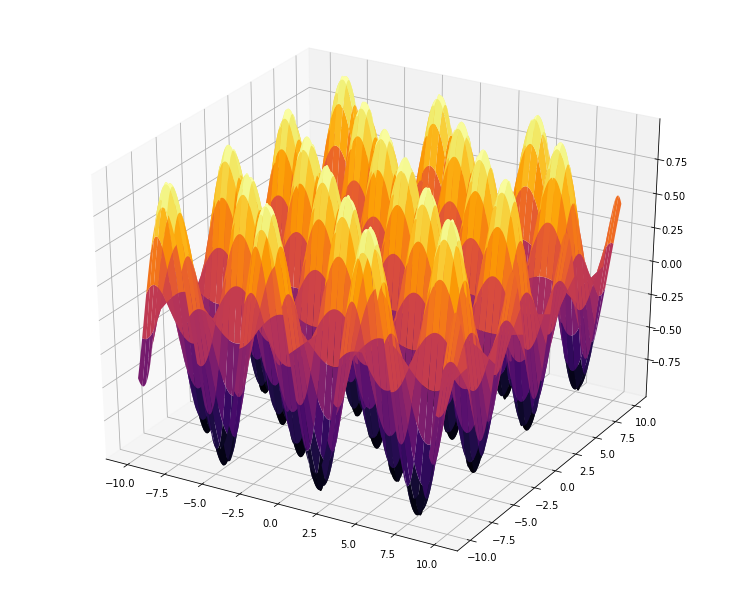

In [121]:
grid_x, grid_y = np.meshgrid(np.arange(-10, 10, 0.01), np.arange(-10, 10, 0.01))
# можно ещё применить np.linspace(...)

draw_f(grid_x, grid_y)

In [122]:
help(Axes3D.plot_surface)

Help on function plot_surface in module mpl_toolkits.mplot3d.axes3d:

plot_surface(self, X, Y, Z, *args, **kwargs)
    Create a surface plot.
    
    By default it will be colored in shades of a solid color,
    but it also supports color mapping by supplying the *cmap*
    argument.
    
    The `rstride` and `cstride` kwargs set the stride used to
    sample the input data to generate the graph.  If 1k by 1k
    arrays are passed in, the default values for the strides will
    result in a 100x100 grid being plotted. Defaults to 10.
    Raises a ValueError if both stride and count kwargs
    (see next section) are provided.
    
    The `rcount` and `ccount` kwargs supersedes `rstride` and
    `cstride` for default sampling method for surface plotting.
    These arguments will determine at most how many evenly spaced
    samples will be taken from the input data to generate the graph.
    This is the default sampling method unless using the 'classic'
    style. Will raise ValueError 

### Задача 5*

Вам дана картинка. При загрузке её размерность равна 3: **(w, h, num_channels)**, где **w** - ширина картинки в пикселях, **h** - высота картинки в пикселях, **num_channels** - количество каналов *(R, G, B, alpha)*.

Вам нужно "развернуть" картинку в одномерный массив размера w \* h \* num_channels, написав **одну строку кода**.

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

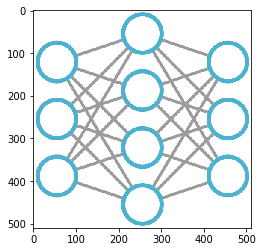

In [16]:
path_to_image = './image.png'
image_array = plt.imread(path_to_image)
plt.imshow(image_array);

In [17]:
flat_image_array = image_array.flatten() # Ваш код здесь

In [18]:
print(image_array.size) # здесь выведите размер нового массива

1040400
